# Erasmus Neural Networks
http://michalbereta.pl/nn
## Widrow-Hoff rule of learning


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Linear regression

In regression problems, the required output of the model is a numeric value.

In the following example, we generate a data from one dimensional problem, i.e., there is just one input (x axis). The output value is numerical (y axis).

The values of `a` and `b` in 

`y = ax + b` 

are the (unknown to us) parameters of some phenomenon.

Usually, the training data we have is in some way 'noisy' (for example, due to the measurement errors). Nevertheless, we want to estimate the real values of `a` and `b`.

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


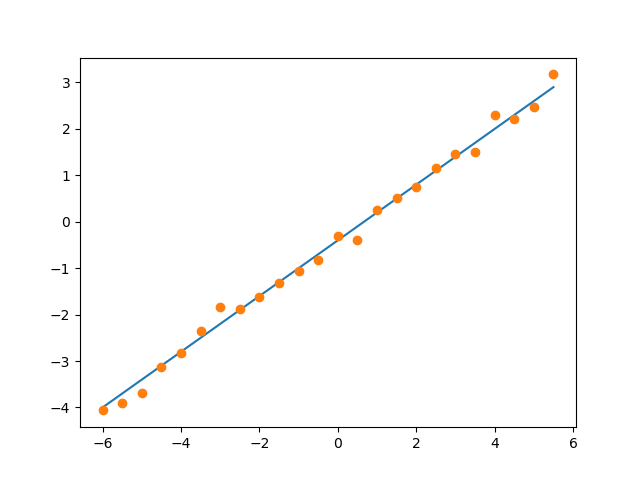

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation



xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

plt.show()

### Linear regression - estimating parameters of a linear model in one step with MSE minimization

In the following example, the parameters `a` and `b` are estimated in one step. 

There is no iterative learning here!

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


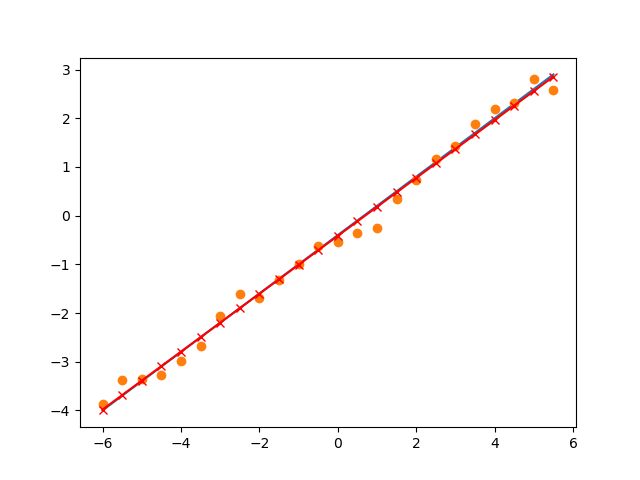

X= [[-6.   1. ]
 [-5.5  1. ]
 [-5.   1. ]
 [-4.5  1. ]
 [-4.   1. ]
 [-3.5  1. ]
 [-3.   1. ]
 [-2.5  1. ]
 [-2.   1. ]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.5  1. ]
 [ 3.   1. ]
 [ 3.5  1. ]
 [ 4.   1. ]
 [ 4.5  1. ]
 [ 5.   1. ]
 [ 5.5  1. ]]
(24, 2)
w= [ 0.59461078 -0.41532602]
training mse =  0.863199810994394
testing mse =  0.02236274100030647


<IPython.core.display.Javascript object>


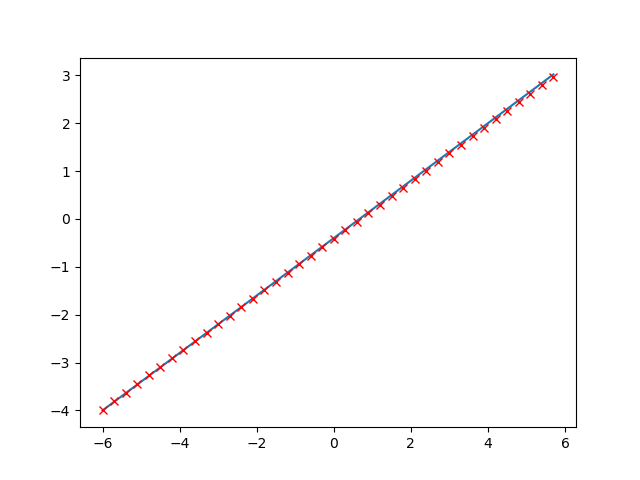

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

#we add the column with "1" values directly here - not efficient in general
X = np.vstack((x, np.ones(len(tr_d)))).T
print('X=',X)
print(X.shape)

#weights for the neuron - there is no iterative process here!
w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)
print('w=', w)

#neuron responses
y = w[0]*x + w[1]
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

#sample some new points as test data
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
y_test = w[0]*x_test + w[1]
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()

### Perceptron training with Widrow-Hoff rule (online version) for classification problems (two classes)

In the following example we optimize the perceptron weights with Widrow-Hoff rule. MSE is minimized during the process.

The two classes are ancode numerically as `1` and `-1`.

#### DO NOT USE THIS CODE AS A TEMPLATE FOR YOUR IMPLEMENTATIONS!

w= [-0.82218834  0.38214409 -0.29305314]


<IPython.core.display.Javascript object>


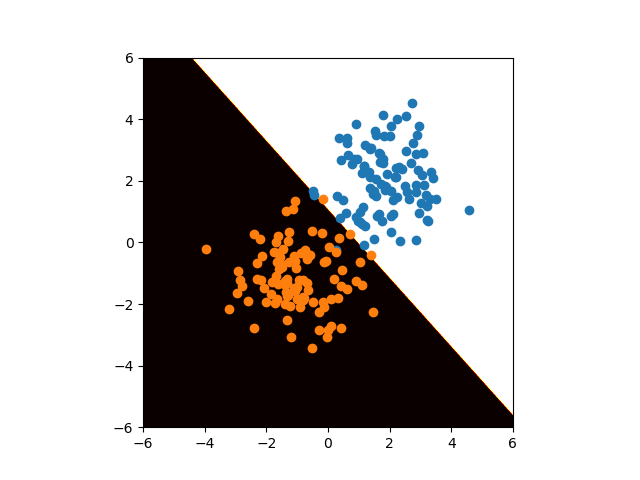

(200, 2)
(2,)
(3,)
end


In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

#example data from two classes, normal distributions
num = 100
x2 = np.random.multivariate_normal([-1,-1], np.array([[1,0],[0,1]]),num)
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
xall = np.vstack((x1,x2))
labels = np.ones(num*2)
labels[num:] = -1.0

xmin = -6
xmax = 6
ymin = -6
ymax = 6

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(3) - 1
#w = np.zeros(3) #try it: not recommended in general
print ('w=',w)


delta = 0.01 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
Z = X*w[1] + Y*w[2] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x2[:,0],x2[:,1],'o')

print (xall.shape)
print (w[1:].shape)
print (w.shape)
#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for examples from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(xall, w[1:]) + w[0]  
    
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[0:num] <= 0).sum() + (ans[num:] > 0).sum()
    print ('errors=',errors)
    
    #learning rate
    eta = 0.001
    #online learning
    #weights modification
    for k in range(num*2):
        w[1] += eta*(labels[k] - ans[k])*xall[k,0]
        w[2] += eta*(labels[k] - ans[k])*xall[k,1]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification        
        #weights vector normalization
        #try it, it seems to be a bad idea here
#        w = w/np.linalg.norm(w) 
    print ('w=',w)
    #vizualization
    plt.clf()
    plt.plot(x1[:,0],x1[:,1],'o')
    plt.plot(x2[:,0],x2[:,1],'o')
    Z = X*w[1] + Y*w[2] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print ('end')

### Task 1

Prepare your own implementation of perceptron learning using Widrow-Hoff algorithm (for classification problems with two classes).

– Use the online or batch mode

– Be ready for any number of attributes (inputs to perceptron)

– Use matrix / vector notation from numpy, avoid unnecessary looping.


In [2]:
#!/usr/bin/env python
import numpy as np

def trainPerceptron(w, d, learningRate, X, bias):

    tr_mse = 10000
    not_decreasing = 0

    while tr_mse > 0:
        for i in range(len(X)):
            y = np.dot(w[1:].T, X[i]) + w[0] * bias
            w[1:] += learningRate * np.dot(d[i] - y, X[i])
            w[0] += learningRate * (d[i] - y) * bias

        temp = np.dot((d - (np.dot(X, w[1:]) + w[0])).T, (d - (np.dot(X, w[1:]) + w[0])))
        if tr_mse <= temp and not_decreasing == 3:
            print("Training MSE: ", tr_mse)
            break
        elif tr_mse <= temp:
            tr_mse = temp
            not_decreasing += 1
        else:
            tr_mse = temp
            not_decreasing = 0

    print('\nLearned everything from train data!\n')
    return w

eta = 0.001
bias = 1
data = np.random.rand(7, 5) * 2 - 1
d = np.random.rand(len(data)) * 2 - 1
w = np.random.random(len(data[0]) + 1) * 2 - 1
print('Weights before training: ', w, '\n')

w = trainPerceptron(w, d, eta, data, bias)
print('Weights learned through training: ', w, '\n')


Weights before training:  [-0.95076495 -0.71250204 -0.00483717  0.20103685 -0.42370436 -0.25609676] 

Training MSE:  0.003116185787132407

Learned everything from train data!

Weights learned through training:  [ 0.98889018  0.90566181 -0.34077436  1.14736109 -0.93824366 -1.55134268] 



### Task 2

Use the 5D data to train your perceptron based on examples from data5D_train.csv. Last column is the class label.

Generate answers (as 1 or -1) for data in data5D_test.csv and save them to a file.

As the output of the model is numerical, the final classification decision is as follow: for the neuron output signal >0 classify the input to the first class (lable 1), otherwise to the second (label -1).

In [3]:
#!/usr/bin/env python
import numpy as np

def trainPerceptron(w, d, learningRate, X, bias):

    tr_mse = 10000
    not_decreasing = 0
    
    while tr_mse > 0:
        for i in range(len(X)):
            y = np.dot(w[1:].T, X[i]) + w[0] * bias
            w[1:] += learningRate * np.dot(d[i] - y, X[i])
            w[0] += learningRate * (d[i] - y) * bias

        temp = np.dot((d - (np.dot(X, w[1:]) + w[0])).T, (d - (np.dot(X, w[1:]) + w[0])))
        if tr_mse <= temp and not_decreasing == 3:
            print("Training MSE: ", tr_mse)
            print("If training MSE > 150 try to run again for better results")
            break
        elif tr_mse <= temp:
            tr_mse = temp
            not_decreasing += 1
        else:
            tr_mse = temp
            not_decreasing = 0

    print('\nLearned everything from train data!\n')
    return w

def testPerceptron(w, X, bias):
    list_y = np.zeros((len(X),1))
    for i in range(len(X)):
        list_y[i] = 1 if np.dot(w[1:].T, X[i]) + w[0] * bias > 0 else -1

    return list_y


eta = 0.001
bias = 1
train_data = np.loadtxt('data5D_train.csv')
d = train_data[:,-1]
train_data = train_data[:,:-1]

w = np.random.random(len(train_data[0]) + 1) * 2 - 1
print('Weights before training: ', w, '\n')

w = trainPerceptron(w, d, eta, train_data, bias)
print('Weights learned through training: ', w, '\n')

test_data = np.loadtxt('data5D_test.csv')
y = testPerceptron(w, test_data, bias)
np.savetxt('output.csv', y, '%i')
print('Saved test results to output.csv')

Weights before training:  [-0.5217437   0.47049055 -0.42794362 -0.02357613 -0.86070989  0.49099183] 

Training MSE:  142.20989959224966
If training MSE > 150 try to run again for better results

Learned everything from train data!

Weights learned through training:  [-0.16523004  0.10109049 -0.19770672  0.13374773 -1.14328154  0.77750986] 

Saved test results to output.csv


### Task 3

Implement Widrow-Hoff online training (update of weights is done after each training example) for linear regression problem. Use the previous example as the starting point.

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


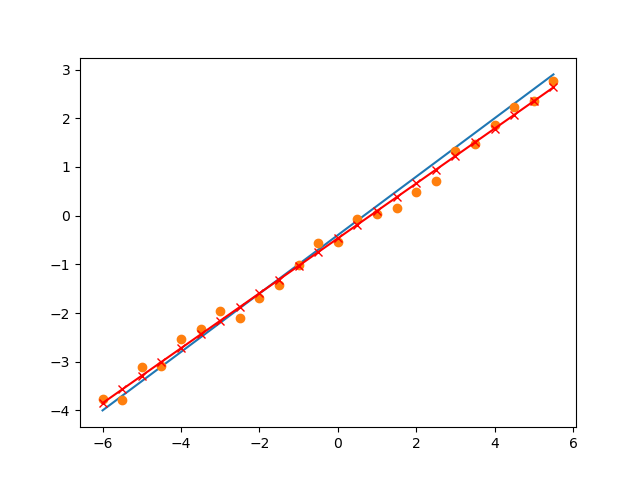

X= [[-6.   1. ]
 [-5.5  1. ]
 [-5.   1. ]
 [-4.5  1. ]
 [-4.   1. ]
 [-3.5  1. ]
 [-3.   1. ]
 [-2.5  1. ]
 [-2.   1. ]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.5  1. ]
 [ 3.   1. ]
 [ 3.5  1. ]
 [ 4.   1. ]
 [ 4.5  1. ]
 [ 5.   1. ]
 [ 5.5  1. ]]
(24, 2)
Batch mode weights: w= [ 0.5631979  -0.46765643]
Online training weights before training:  [-0.42501361 -0.57368964] 

Online mode Training MSE:  0.5012280174631426

Learned everything from train data!

Weights learned through training:  [ 0.56393567 -0.46751101] 

training mse =  0.5012280566682219
testing mse =  0.7781781132068477


<IPython.core.display.Javascript object>


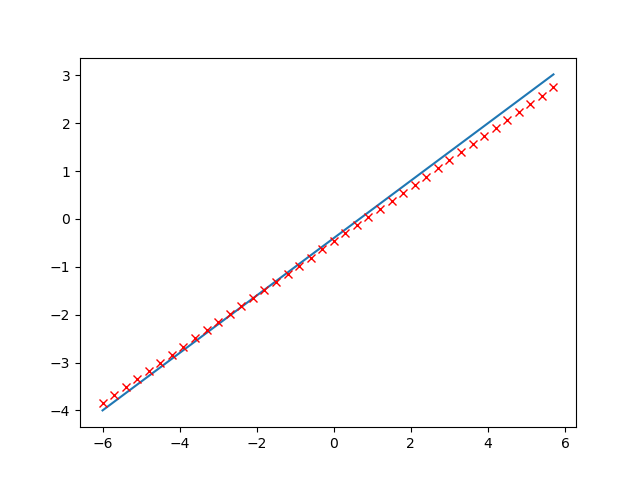

In [54]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

def trainPerceptron(w, d, learningRate, X):

    tr_mse = 10000
    while tr_mse > 0:
        for i in range(len(X)):
            w += learningRate * np.dot(d[i] - np.dot(w.T, X[i]), X[i])

        temp = np.dot((d - np.dot(X, w)).T, (d - np.dot(X, w)))
        if tr_mse <= temp:
            print("Online mode Training MSE: ", tr_mse)
            break
        else:
            tr_mse = temp

    print('\nLearned everything from train data!\n')
    return w


xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

#we add the column with "1" values directly here - not efficient in general
X = np.vstack((x, np.ones(len(tr_d)))).T
print('X=',X)
print(X.shape)


#weights for the neuron - there is no iterative process here!
w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)
print('Batch mode weights: w=', w)

w = np.random.random(len(X[0])) * 2 - 1
print('Online training weights before training: ', w, '\n')

eta = 0.001
w = trainPerceptron(w, tr_d, eta, X)
print('Weights learned through training: ', w, '\n')

#neuron responses
y = w[0]*x + w[1]
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
t_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', t_mse)

#sample some new points as test data
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
y_test = w[0]*x_test + w[1]
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()